In [1]:
%matplotlib notebook

from IPython.display import Image
from simplify.face_lattice import *
from simplify.simplify import *
from simplify.plot import *
from simplify.homothety import *
from islpy import *
from IPython.display import Image
import networkx as nx
import graphviz as gv
from islplot.support import *
import islplot.plotter as islp

constraints:
c0	[[-1  1 10]	{ [i, j] : 10 - i + j >= 0 }
c1	 [ 0  1  0]	{ [i, j] : j >= 0 }
c2	 [ 0 -1 15]	{ [i, j] : 15 - j >= 0 }
c3	 [ 1 -1  0]]	{ [i, j] : i - j >= 0 }

Simplifications
@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-10 + i)] }
  L@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [1, 0] } 
    @{}:@{1}, {[i,j]->[i]} :: Action.NONE 
  R@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-10 + j)] }
    L@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [-1, 0] } 
      @{}:@{1}, {[i,j]->[i]} :: Action.NONE 
    R@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-15 + i)] }
      L@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [1, 0] } 
        @{}:@{1}, {[i,j]->[i]} :: Action.NONE 
      R@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [-1, 0] } 
        @{}:@{1}, {[i,j]->[i]} :: Action.NONE 


<IPython.core.display.Javascript object>


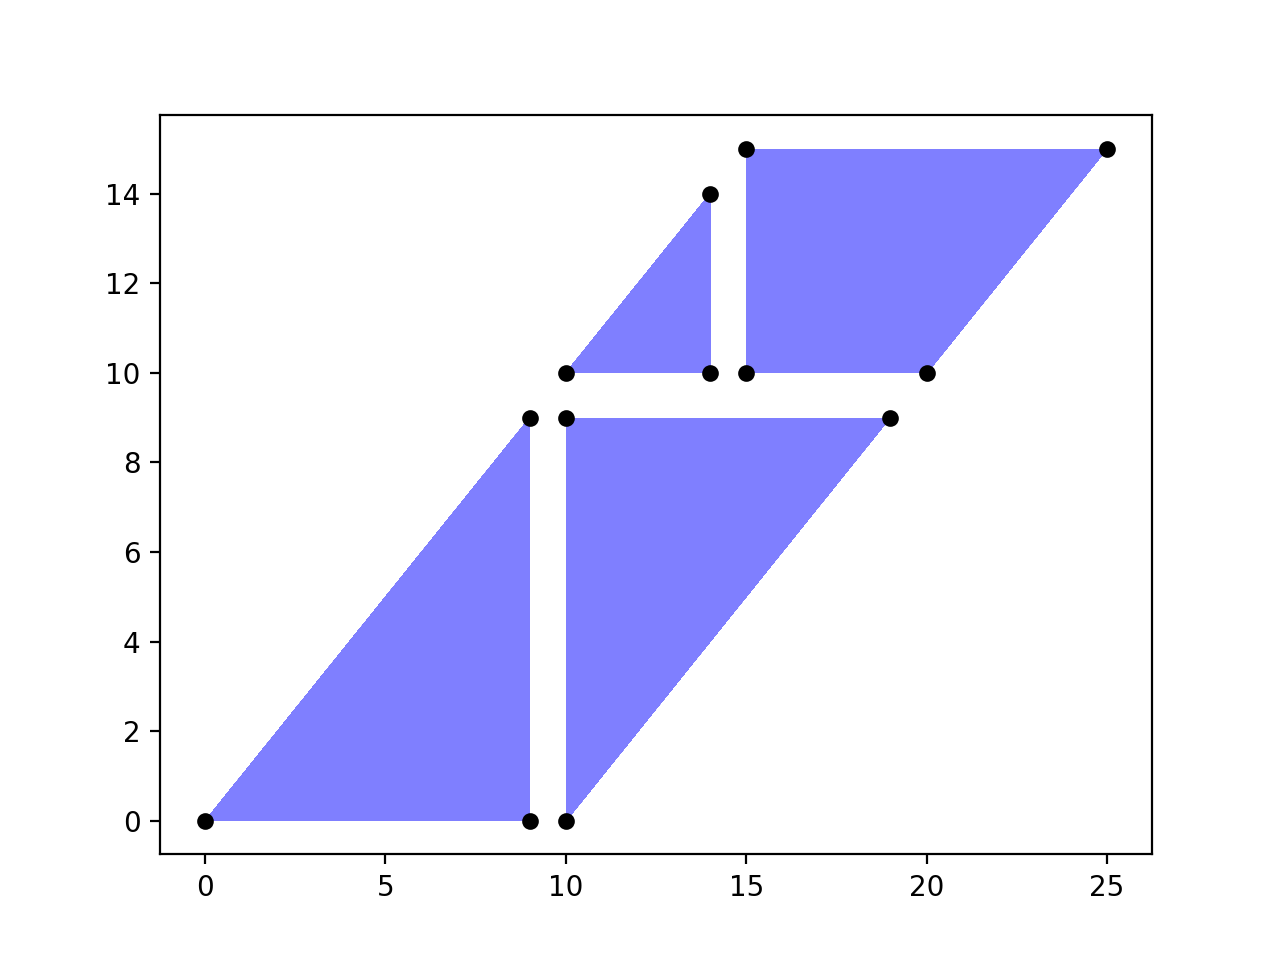

In [2]:
# simplest 2D parallelogram
op = 'max'
fp = '{[i,j]->[i]}'
fd = '{[i,j]->[j]}'
s = '{[i,j] : 0<=j and i-10<=j and j<=i and j<=15 }'

successes = start(op, fp, s, fd, verbose=False, report_all=False)

fig = islp._plt.figure()
for success in successes:
    S = None
    for P in success.get_splits(result=set()):
        islp.plot_bset_shape(P, figure=fig)

constraints:
c0	[[-1  1 10]	{ [i, j] : 10 - i + j >= 0 }
c1	 [ 0  1  0]	{ [i, j] : j >= 0 }
c2	 [ 1 -1  0]	{ [i, j] : i - j >= 0 }
c3	 [ 1 -2 14]]	{ [i, j] : 14 + i - 2j >= 0 }

Simplifications
@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-10 + i)] }
  L@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [1, 0] } 
    @{}:@{1}, {[i,j]->[i]} :: Action.NONE 
  R@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-14 + i)] }
    L@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-10 + j)] }
      L@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [-1, 0] } 
        @{}:@{2}, {[i,j]->[i]} :: Action.NONE 
      R@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [1, 0] } 
        @{}:@{2}, {[i,j]->[i]} :: Action.NONE 
    R@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-14 + j)] }
      L@{}:@{}, {[i,j]->[i]} :: Action.RHO, { [-1, 0] } 
        @{}:@{1}, {[i,j]->[i]} :: Action.NONE 
      R@{}:@{}, {[i,j]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j] -> [(-24 + i

<IPython.core.display.Javascript object>


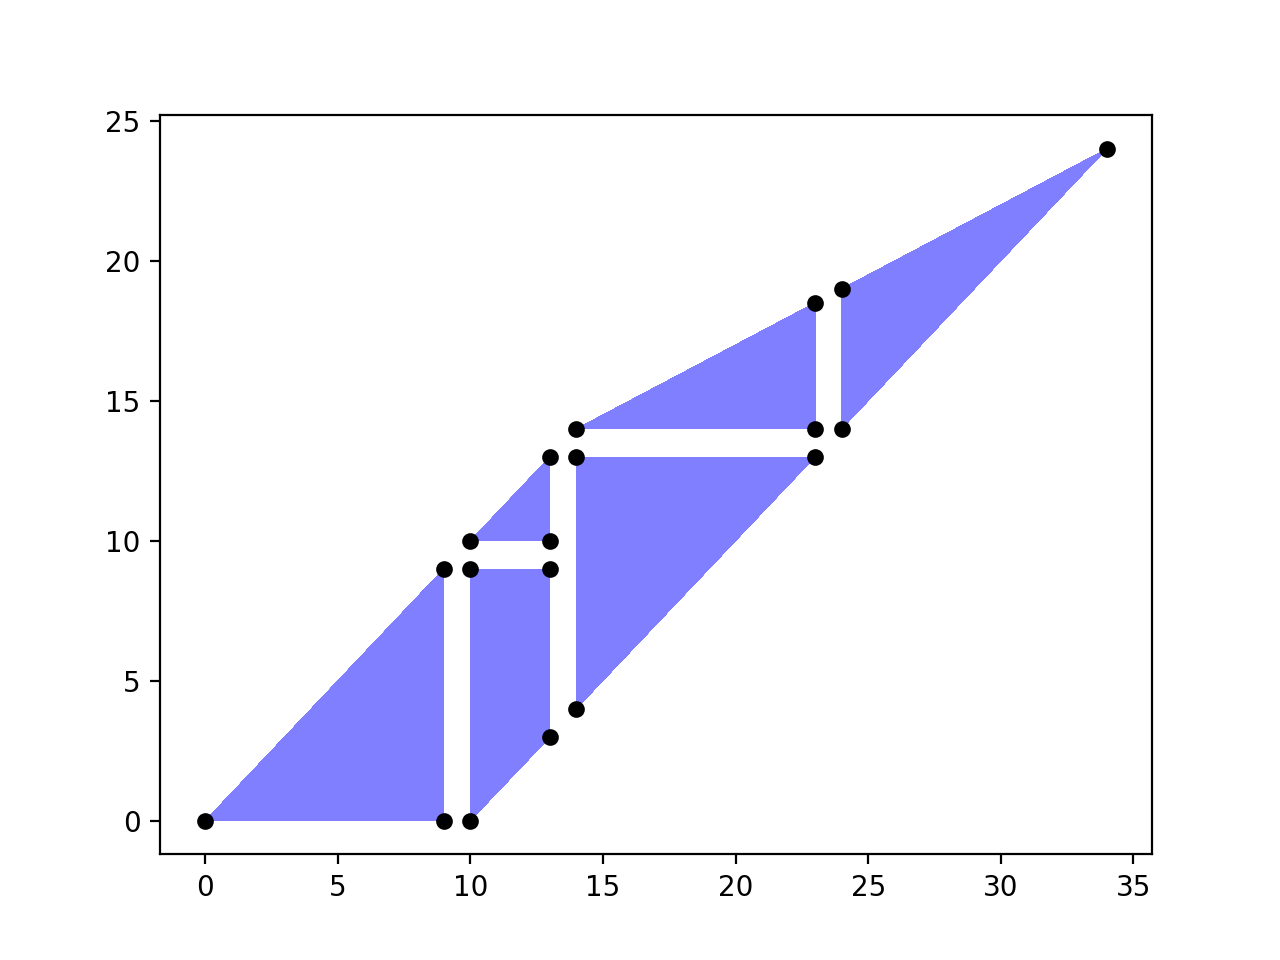

In [3]:
# slightly less simple 2D example
op = 'max'
fp = '{[i,j]->[i]}'
fd = '{[i,j]->[j]}'
s = '{[i,j] : 0<=j and i-10<=j and j<=i and 2j<=i+14 }'

successes = start(op, fp, s, fd, verbose=False, report_all=False)

fig = islp._plt.figure()
for success in successes:
    S = None
    for P in success.get_splits(result=set()):
        islp.plot_bset_shape(P, figure=fig)

constraints:
c0	[[-1  0  1 10]	{ [i, j, k] : 10 - i + k >= 0 }
c1	 [ 0 -1  1 10]	{ [i, j, k] : 10 - j + k >= 0 }
c2	 [ 0  0  1  0]	{ [i, j, k] : k >= 0 }
c3	 [ 0  0 -1  5]	{ [i, j, k] : 5 - k >= 0 }
c4	 [ 0  1 -1  0]	{ [i, j, k] : j - k >= 0 }
c5	 [ 1  0 -1  0]]	{ [i, j, k] : i - k >= 0 }

Simplifications
@{}:@{}, {[i,j,k]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-10 + i)] }
  L@{}:@{}, {[i,j,k]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-5 + i)] }
    L@{}:@{}, {[i,j,k]->[i]} :: Action.DECOMPOSITION, {[i,j,k]->[-j + k,i]} on {4}
      @{}:@{}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [1, 0, 0] } 
        @{}:@{3}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [0, -1, 0] } 
          @{}:@{1, 3}, {[i,j,k]->[-j + k,i]} :: Action.NONE 
    R@{}:@{}, {[i,j,k]->[i]} :: Action.DECOMPOSITION, {[i,j,k]->[-j + k,i]} on {5}
      @{}:@{}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [0, -1, 0] } 
        @{}:@{2}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [-1, 0, 0] } 
          @{}:@{1, 2}, 

<IPython.core.display.Javascript object>


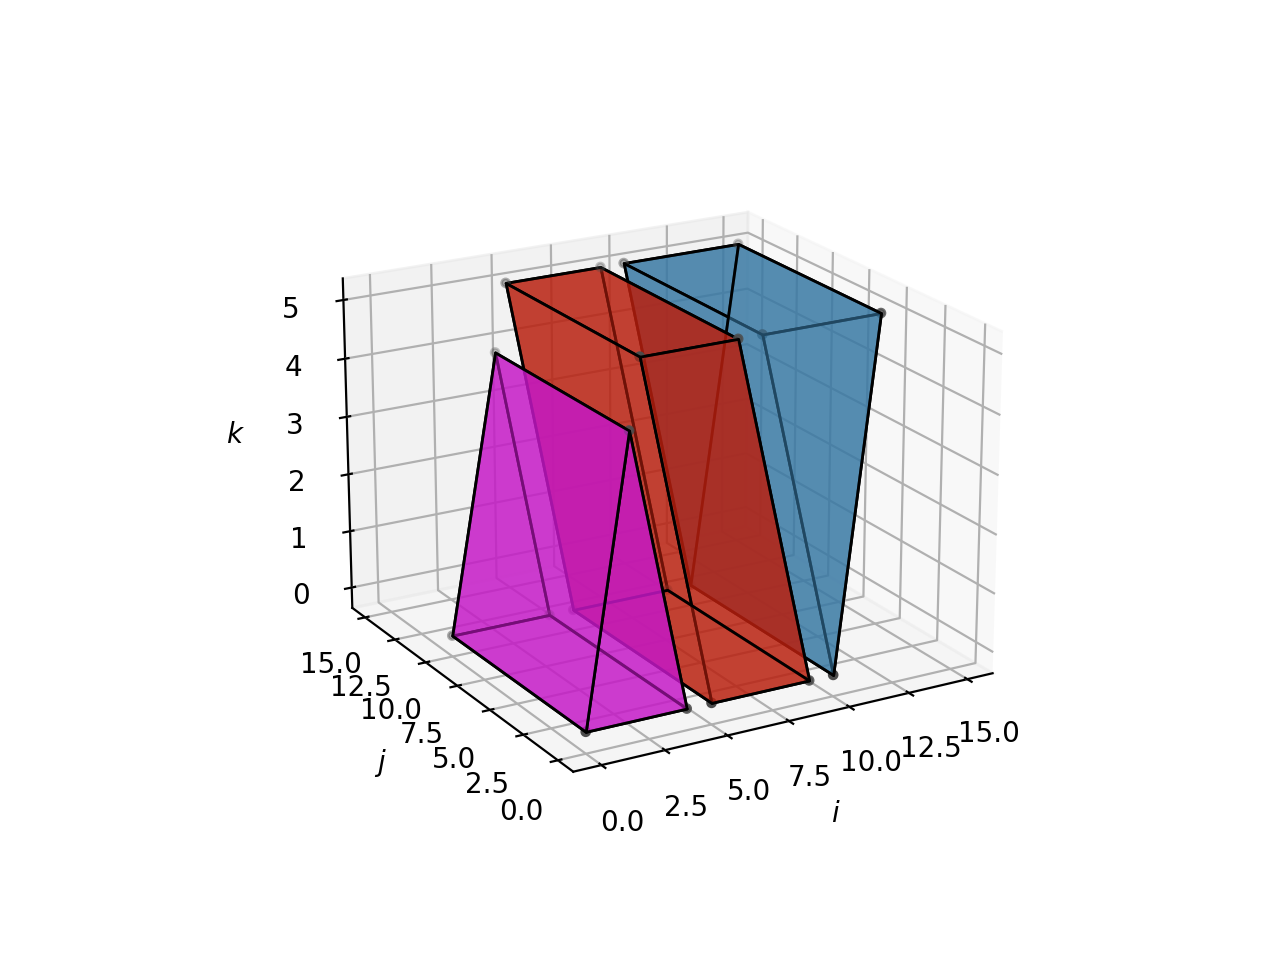

In [4]:
# 3D parallelpiped - v0
op = 'max'
fp = '{[i,j,k]->[i]}'
fd = '{[i,j,k]->[k]}'
s = '{[i,j,k] : k<=i,j<=10+k and 0<=k<=5}'

successes = start(op, fp, s, fd, verbose=False, report_all=False, check_homothety=False)

for success in successes:
    P = success.get_splits(result=set())
    [print(p) for p in P]
    plot_3d_sets(P)

constraints:
c0	[[-1  0  1 10]	{ [i, j, k] : 10 - i + k >= 0 }
c1	 [ 0 -1  1 10]	{ [i, j, k] : 10 - j + k >= 0 }
c2	 [ 0  0  1  0]	{ [i, j, k] : k >= 0 }
c3	 [ 0  0 -1 15]	{ [i, j, k] : 15 - k >= 0 }
c4	 [ 0  1 -1  0]	{ [i, j, k] : j - k >= 0 }
c5	 [ 1  0 -1  0]]	{ [i, j, k] : i - k >= 0 }

Simplifications
@{}:@{}, {[i,j,k]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-10 + i)] }
  L@{}:@{}, {[i,j,k]->[i]} :: Action.DECOMPOSITION, {[i,j,k]->[-j + k,i]} on {2}
    @{}:@{}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [1, 0, 0] } 
      @{}:@{4}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [0, -1, 0] } 
        @{}:@{2, 4}, {[i,j,k]->[-j + k,i]} :: Action.NONE 
  R@{}:@{}, {[i,j,k]->[i]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-10 + k)] }
    L@{}:@{}, {[i,j,k]->[i]} :: Action.DECOMPOSITION, {[i,j,k]->[-j + k,i]} on {4}
      @{}:@{}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [-1, 0, 0] } 
        @{}:@{1}, {[i,j,k]->[-j + k,i]} :: Action.RHO, { [0, -1, 0] } 
          @{}:@{1, 2}, {[i,j,

<IPython.core.display.Javascript object>


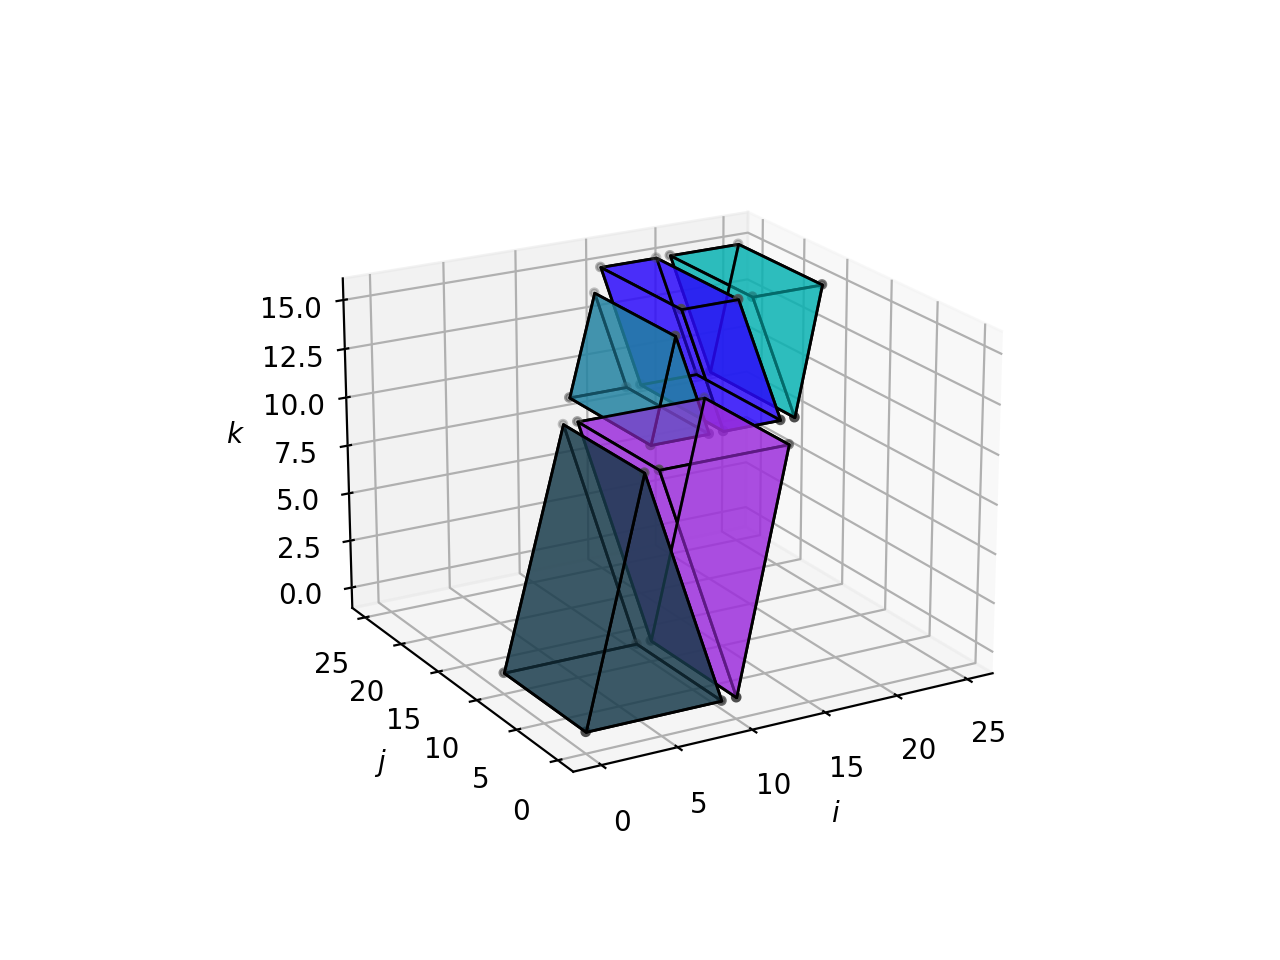

In [5]:
# 3D parallelpiped - v1
op = 'max'
fp = '{[i,j,k]->[i]}'
fd = '{[i,j,k]->[k]}'
s = '{[i,j,k] : k<=i,j<=10+k and 0<=k<=15}'

successes = start(op, fp, s, fd, verbose=False, report_all=False, check_homothety=False)

for success in successes:
    P = success.get_splits(result=set())
    [print(p) for p in P]
    plot_3d_sets(P)

constraints:
c0	[[-1  0  1 10]	{ [i, j, k] : 10 - i + k >= 0 }
c1	 [ 0 -1  1 10]	{ [i, j, k] : 10 - j + k >= 0 }
c2	 [ 0  0  1  0]	{ [i, j, k] : k >= 0 }
c3	 [ 0  0 -1 10]	{ [i, j, k] : 10 - k >= 0 }
c4	 [ 0  1 -1  0]	{ [i, j, k] : j - k >= 0 }
c5	 [ 1  0 -1  0]]	{ [i, j, k] : i - k >= 0 }

Simplifications
@{}:@{}, {[i,j,k]->[i,j]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-2i + j)] }
  L@{}:@{}, {[i,j,k]->[i,j]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-i + j)] }
    L@{}:@{}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 1, 0] } 
      @{}:@{3}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 0, 0] } 
        @{}:@{2, 3}, {[i,j,k]->[i,j]} :: Action.NONE 
    R@{}:@{}, {[i,j,k]->[i,j]} :: Action.RHO, { [1, 0, 0] } 
      @{}:@{2}, {[i,j,k]->[i,j]} :: Action.RHO, { [0, -1, 0] } 
        @{}:@{1, 2}, {[i,j,k]->[i,j]} :: Action.NONE 
  R@{}:@{}, {[i,j,k]->[i,j]} :: Action.RHO, { [1, -1, 0] } 
    @{}:@{2}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 0, 0] } 
      @{}:@{0, 2}, {[i,j,k]->[i,j]} :: Ac

<IPython.core.display.Javascript object>


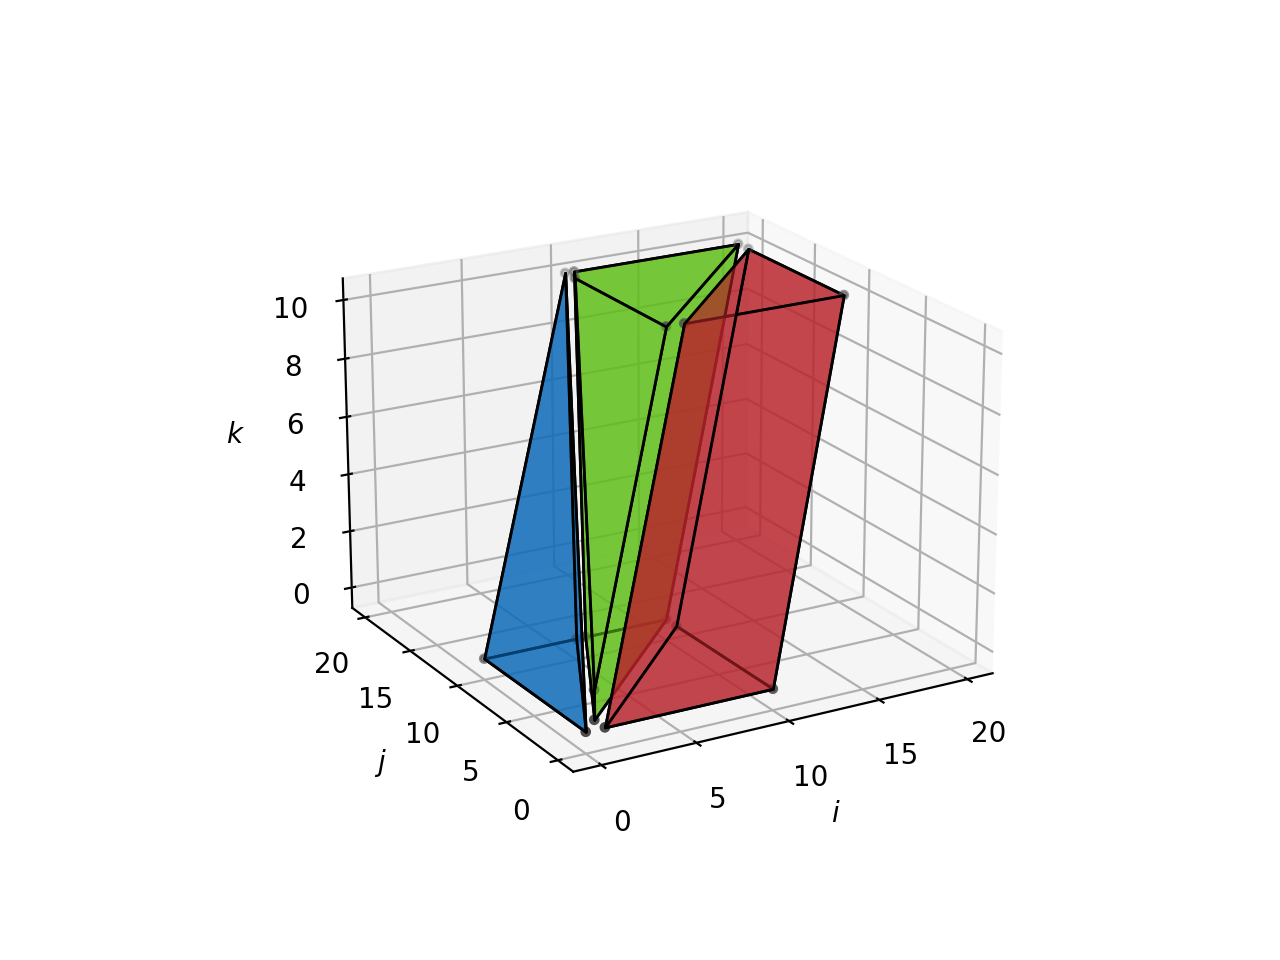

In [6]:
# 3D parallelpiped - v2
op = 'max'
fp = '{[i,j,k]->[i,j]}'
fd = '{[i,j,k]->[k]}'
s = '{[i,j,k] : k<=i,j<=10+k and 0<=k<=10}'

successes = start(op, fp, s, fd, verbose=False, report_all=False, check_homothety=False)

for success in successes:
    P = success.get_splits(result=set())
    [print(p) for p in P]
    plot_3d_sets(P)

constraints:
c0	[[-1  0  1 10]	{ [i, j, k] : 10 - i + k >= 0 }
c1	 [ 0 -1  1 10]	{ [i, j, k] : 10 - j + k >= 0 }
c2	 [ 0  0  1  0]	{ [i, j, k] : k >= 0 }
c3	 [ 0  0 -1  5]	{ [i, j, k] : 5 - k >= 0 }
c4	 [ 0  1 -1  0]	{ [i, j, k] : j - k >= 0 }
c5	 [ 1  0 -1  0]]	{ [i, j, k] : i - k >= 0 }

Simplifications
@{}:@{}, {[i,j,k]->[i,j]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-i + 3j)] }
  L@{}:@{}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 1, 0] } 
    @{}:@{2}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 0, 0] } 
      @{}:@{1, 2}, {[i,j,k]->[i,j]} :: Action.NONE 
  R@{}:@{}, {[i,j,k]->[i,j]} :: Action.INDEX_SET_SPLIT at { [i, j, k] -> [(-i + j)] }
    L@{}:@{}, {[i,j,k]->[i,j]} :: Action.RHO, { [0, 1, 0] } 
      @{}:@{3}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 0, 0] } 
        @{}:@{1, 3}, {[i,j,k]->[i,j]} :: Action.NONE 
    R@{}:@{}, {[i,j,k]->[i,j]} :: Action.RHO, { [1, -1, 0] } 
      @{}:@{3}, {[i,j,k]->[i,j]} :: Action.RHO, { [-1, 0, 0] } 
        @{}:@{0, 3}, {[i,j,k]->[i,j]} :: Act

<IPython.core.display.Javascript object>


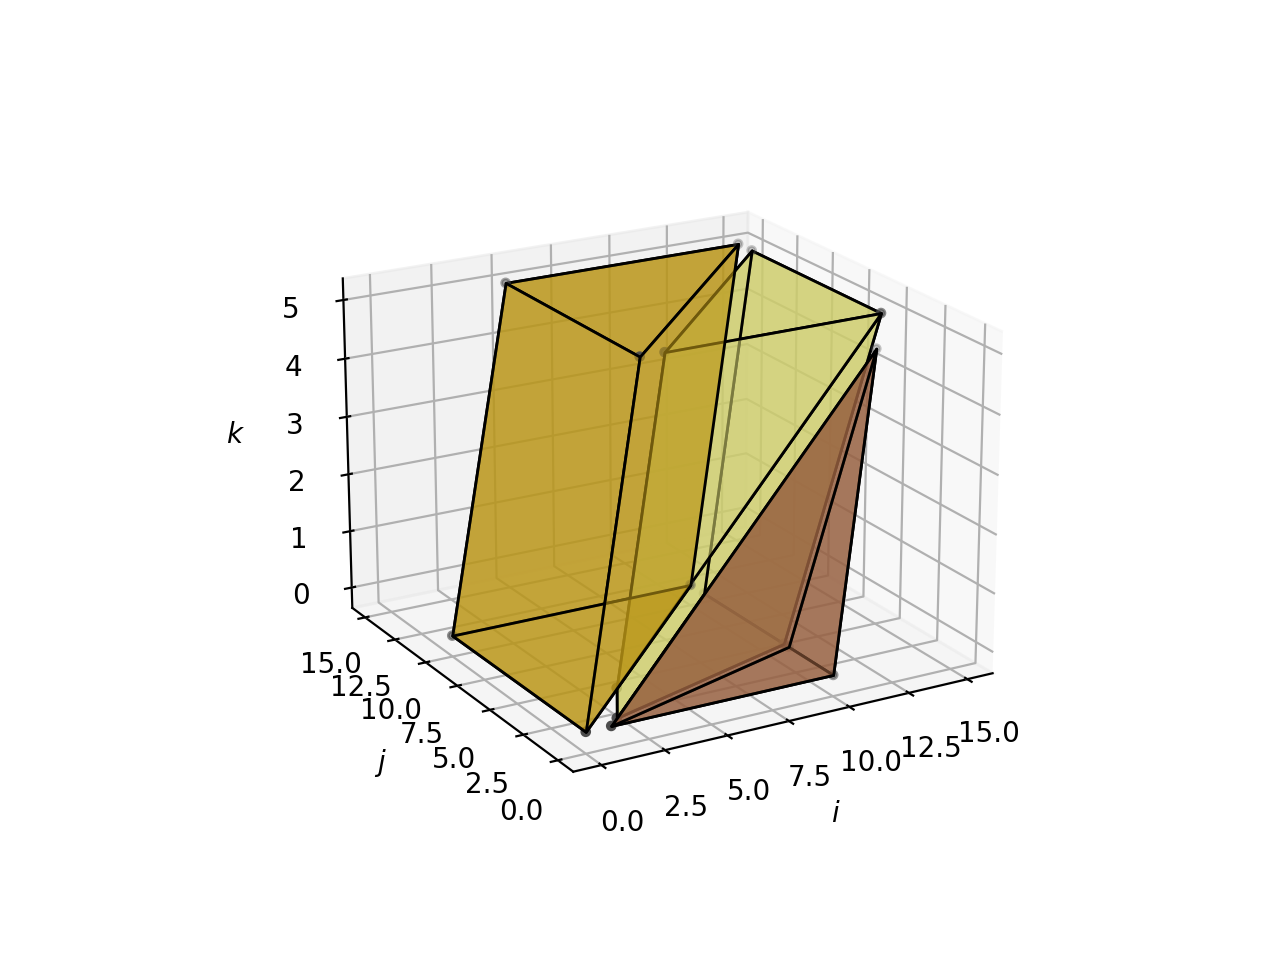

In [7]:
# 3D parallelpiped
op = 'max'
fp = '{[i,j,k]->[i,j]}'
fd = '{[i,j,k]->[k]}'
s = '{[i,j,k] : k<=i,j<=10+k and 0<=k<=5}'

successes = start(op, fp, s, fd, verbose=False, report_all=False, check_homothety=False)

for success in successes:
    P = success.get_splits(result=set())
    [print(p) for p in P]
    plot_3d_sets(P)

notes:
* not every possible vertex combo make a good cut, we could value cuts along the "largest" dim first (i.e., keep aspect ratio as even as possible)
* parametric case doesn't work as is